# PyTorch Computer Vision & CNN
#coding/python #coding/deeplearning

**References**
- [YT: Learn PyTorch for Deep Learing](https://youtu.be/Z_ikDlimN6A?t=50419)
- [LearnPyTorch.io](https://www.learnpytorch.io/03_pytorch_computer_vision/)

## 01. Introduction to computer vision
**Potential Applications**
- BCC - dog or cat?
- MCC - what kind of food?
- object detection
- segmentation

**Outline**
- getting vision dataset using `torchvision.datasets`
- architecture of CNN
- E2E multi-class image classification
- steps in modeling with CNN
  - create CNN model
  - pick loss & optimizer
  - train a model
  - evaluate a model

## 02. Computer vision input and outputs
- CNN usually used in image data

**Method**
- numerically represent images as tensors
  - (NHWC): color channels last
  - (NCHW): color channels first
- feed into ML algorithm
- probabilites

**Steps**
1. Data Preperation
  - `torchvision.transforms`
  - `torch.utils.data.Dataset`
  - `torch.utils.data.DataLoader`
2. Build Model
  - `torch.nn`
  - `torch.nn.Module`
  - `torchvision.models`
3. Loss Fn & Optimizer
  - `torch.optim`
4. Evaluate Model
  - `torchmetrics`
5. Improve via Experimentation
  - `torch.utils.tensorboard`

## 03. What is a convolutional neural network?
**Architecture**
- input image
  - target image
- input layer
  - processed target image
  - `input_shape = [batch_size, ht, wd, color_channels]`
- convolution layer
  - extracts/learns features from target image
  - `torch.nn.ConvXd()`
- hidden activation/non-linear activation
  - adds non-linearity
  - usually `torch.nn.ReLU()`
- pooling layer
  - reduces dimensionality of learned features
  - usually `torch.nn.MaxPool2d()`
- output layer/linear layer
  - takes learned features and outputs into shape of target label
  - `torch.nn.Linear(out_features=[output-shape])
- output activation
  - convert output logits into prediction probabilities


## 04. TorchVision
**Computer Vision libraries**
- `torchvision`
- `torchvision.datasets`
- `torchvision.models`
- `torchvision.transforms`
- `torch.utils.data.Dataset`
- `torch.utils.data.DataLoader`

In [1]:
# Import Libraries
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


## 05. Getting a computer vision dataset
Dataset: FashionMNIST


In [3]:
# Setup Training Data
train_data = datasets.FashionMNIST
train_data = datasets.FashionMNIST(
    root='data',
    train=True, 
    download=True,
    transform=ToTensor(), # Transforms image or ndarray to tensor
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False, 
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

Using downloaded and verified file: data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [14]:
image, label = train_data[0]
class_names = train_data.classes
print(f"len(train_data), len(test_data)")
print(f"{class_names}")

len(train_data), len(test_data)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Text(0.5, 1.0, 'Ankle boot')

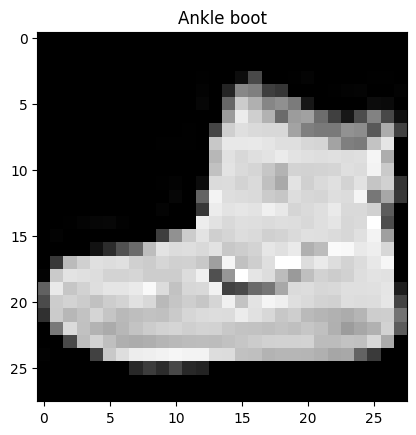

In [17]:
# Visualize data
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])

# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,)

## 06. Mini-batches


## 07. Creating DataLoaders
- Currently, data is in the form of PyTorch Datasets
- DataLoader: turns dataset into a Python iterable

**Creating Batches**
1. allows the cpu to store smaller batches (vs full)
   - computationally efficient
   - common batch size = 32
2. gives NN more chances to update its gradient per epoch

**Steps**
1. `torchvision.datasets.FashionMNIST`
2. `torch.utils.data.DataLoader`
   - `DataLoader(dataset, batch_size, shuffle=True)`


Length: 1875 | 313
torch.Size([32, 1, 28, 28]), torch.Size([32])
Image size: torch.Size([1, 28, 28])


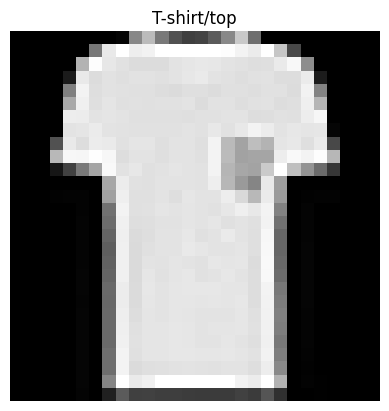

In [24]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                    batch_size=BATCH_SIZE,
                    shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                    batch_size=BATCH_SIZE,
                    shuffle=True)

# Visualize
print(f"Length: {len(train_dataloader)} | {len(test_dataloader)}")

train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"{train_features_batch.shape}, {train_labels_batch.shape}")

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")

Building a **baseline** model is a best practice, starting with a simple model and add complexity from there.

In [27]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]
print(f"{x.shape}")

output = flatten_model(x)
print(f"{output.shape}")

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [29]:
# Define base model
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [31]:
# Create base model instance
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)

dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [33]:
# Import external file
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('File exists.')
else:
  print('Downloading file...')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)


**Typical Evaluation Metrics**
- model performance (loss and accuracy)
- how fast it runs

In [37]:
# Setup loss, optimizer, and eval metrics
from helper_functions import accuracy_fn

loss_fn_v0 = nn.CrossEntropyLoss()
optimizer_v0 = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [34]:
# Setup timer metric
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end - start
  print(f"Train time: {total_time:.3f} seconds")
  return total_time

start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time)

Train time: 0.000 seconds


1.308100763708353e-05

## 08. Training and testing loops for batched data
Creating a training loop
- loop through epochs
- loop through training batches
- loop through testing batches
- print out what's happening

In [38]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start = timer()

epochs = 3 

# Create train & test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")

  ### TRAINING
  train_loss = 0
  ## NOTE: model parameters are updated per batch
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)
    # 2. Calculate the loss
    loss = loss_fn_v0(y_pred, y)
    train_loss += loss # to be averaged per batch
    # 3. Optimizer zero grad
    optimizer_v0.zero_grad()
    # 4. Loss backward
    loss.backward()
    # 5. Optimizer step
    optimizer_v0.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader)

  ### TESTING
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)
      # 2. Calc loss
      test_loss += loss_fn_v0(test_pred, y_test)
      # 3. Calc accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")

train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start, end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:07<00:15,  7.61s/it]


Train loss: 0.5904 | Test loss: 0.5102, test acc: 82.0387
Epoch: 1
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:15<00:07,  7.50s/it]


Train loss: 0.4743 | Test loss: 0.5268, test acc: 81.6793
Epoch: 2
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:22<00:00,  7.50s/it]


Train loss: 0.4537 | Test loss: 0.5126, test acc: 82.9972
Train time: 22.502 seconds


In [40]:
# Make predictions
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
        # Make predictions
        y_pred = model(X)

        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc,
          }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model_0, data_loader=test_dataloader, loss_fn=loss_fn_v0, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5119837522506714,
 'model_acc': 83.02715654952077}

## 09. Running experiments on the GPU
https://youtu.be/Z_ikDlimN6A?t=59160

## 10. Creating a model with non-linear functions


## 11. Creating a train/test loop


## 12. Convolutional neural networks (overview)


## 13. Coding a CNN


## 14. Breaking down nn.Conv2d/nn.MaxPool2d


## 15. Training our first CNN


## 16. Making predictions on random test samples


## 17. Plotting our best model predictions


## 18. Evaluating model predictions with a confusion matrix